<b><u>Credit Card Customer Segmentation Using K-means Clustering</b></u>

Assuming that we're a Data Scientist for a Credit Card company, we'll try segmenting the customers using K-means Clustering Algorithm and try to provide insights with the given that so that it'll help our organization to apply different marketing strategies to potential customers.

In [1]:
#Importing all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
#Reading the data using pandas
customers = pd.read_csv('customer_segmentation.csv')
print(customers.head())

   customer_id  age gender  dependent_count education_level marital_status  \
0    768805383   45      M                3     High School        Married   
1    818770008   49      F                5        Graduate         Single   
2    713982108   51      M                3        Graduate        Married   
3    769911858   40      F                4     High School        Unknown   
4    709106358   40      M                3      Uneducated        Married   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1             

In [3]:
#Types of data present in this dataset
customers.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [4]:
#No.of observations and features in this dataset
customers.shape


(10127, 14)

The dataset contains 10127 observations ie., customers and 14 features(categorical and numerical) ie.,14 different types of information about each customer. Out of these 14 features , We can see that 11 (int +float) of them are numerical and 3 of features are categorical. With this data we can provide insights based on features that are correlated to ascertain the pattern. 

In [5]:
#Finding out if there are any missing values in our dataset
customers.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

Fortunately, Our data has 0 missing values . Now that we know that our data is cleaned, We can start on finding the correlations between the features that affect or may affect the market demand for our Credit card.

In [6]:
print(customers['gender'].value_counts())

F    5358
M    4769
Name: gender, dtype: int64


Our dataset is somewhat equally distributed in terms of gender. So there's no need for us to collect any data as well. 

The columns Avg utilization ratio, credit limit and Total transaction amount are correlated as it gives us a pattern of the customers spending capability. 

In [7]:
numeric_cols = customers.select_dtypes(include=['number'])

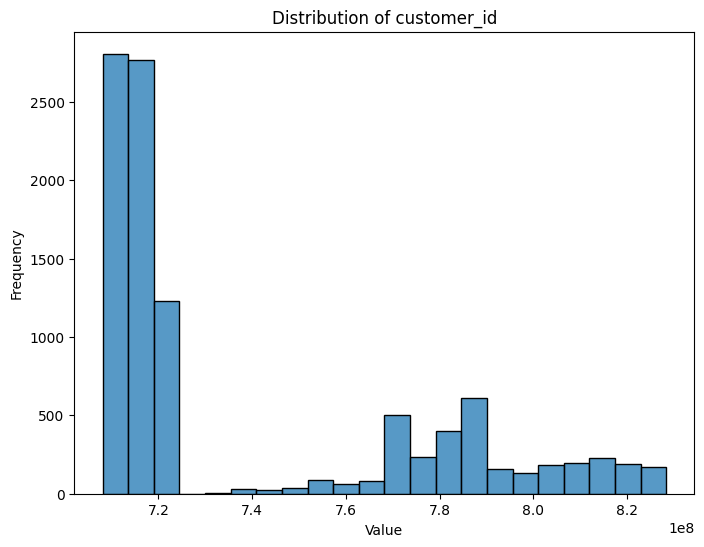

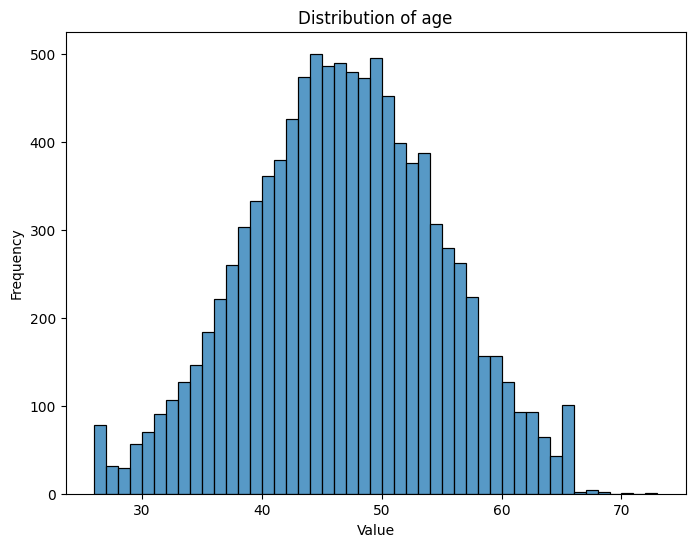

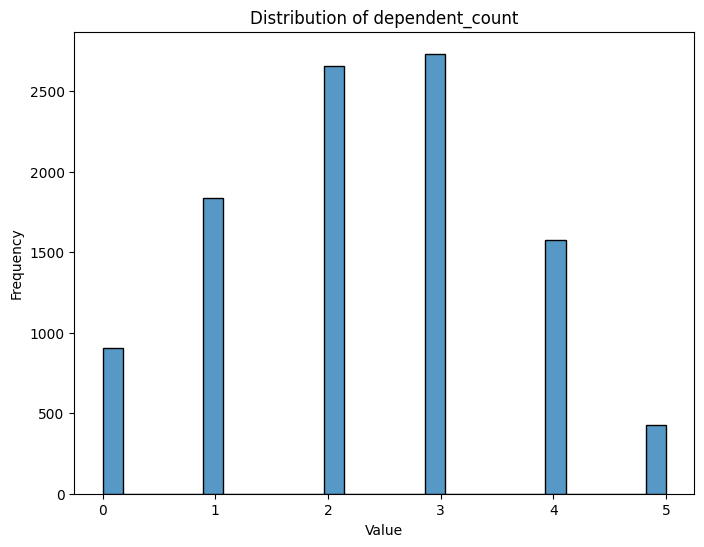

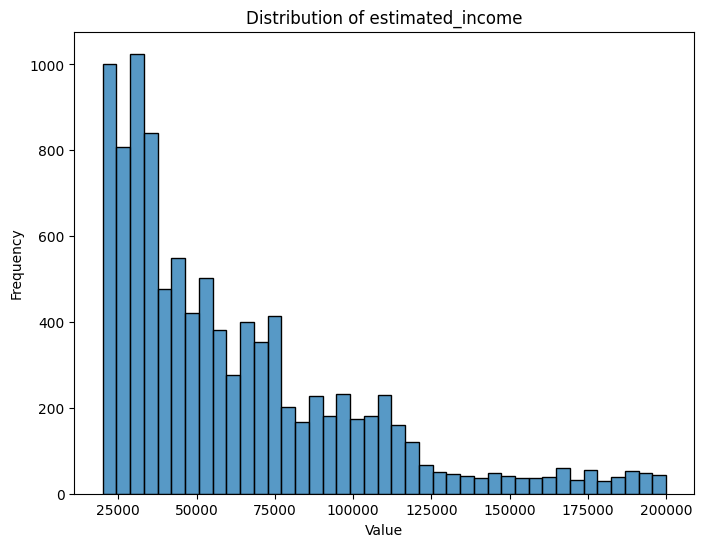

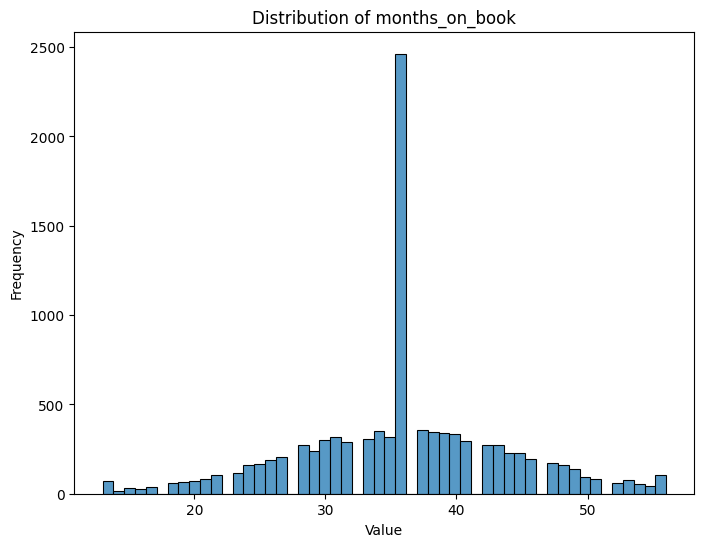

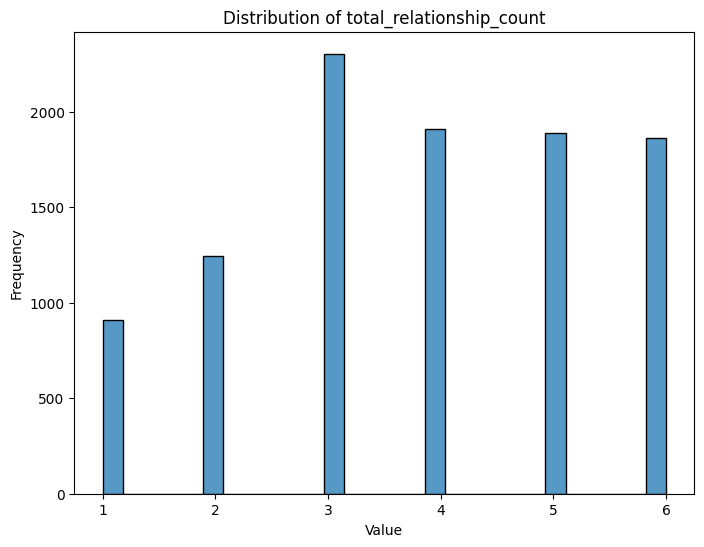

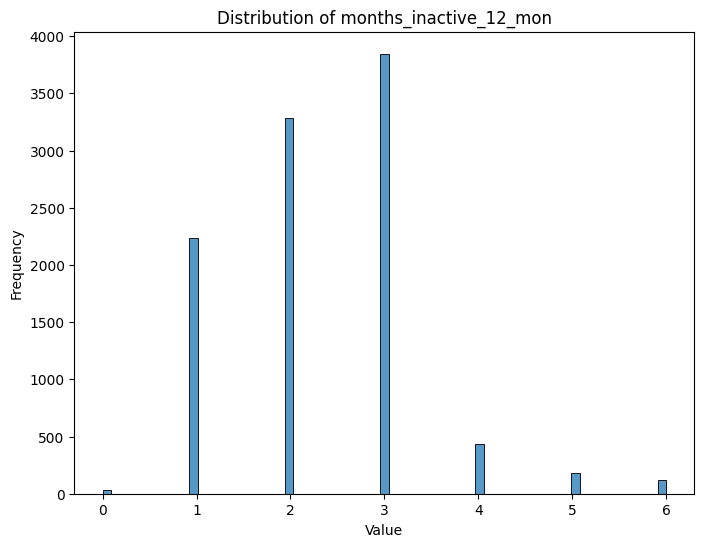

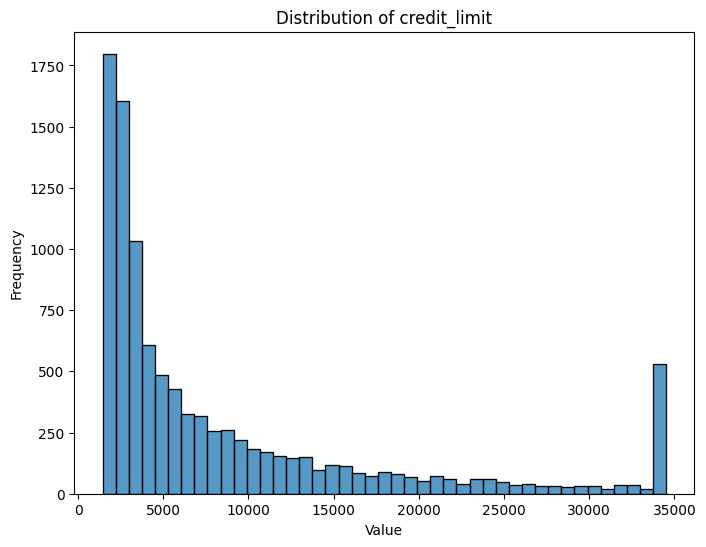

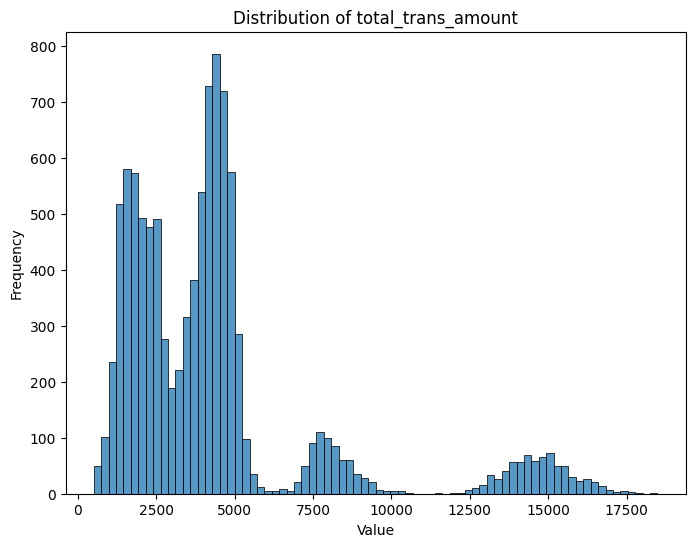

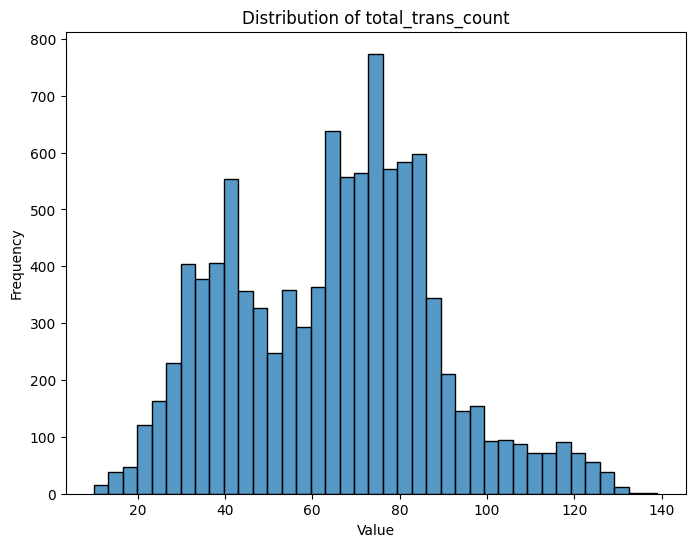

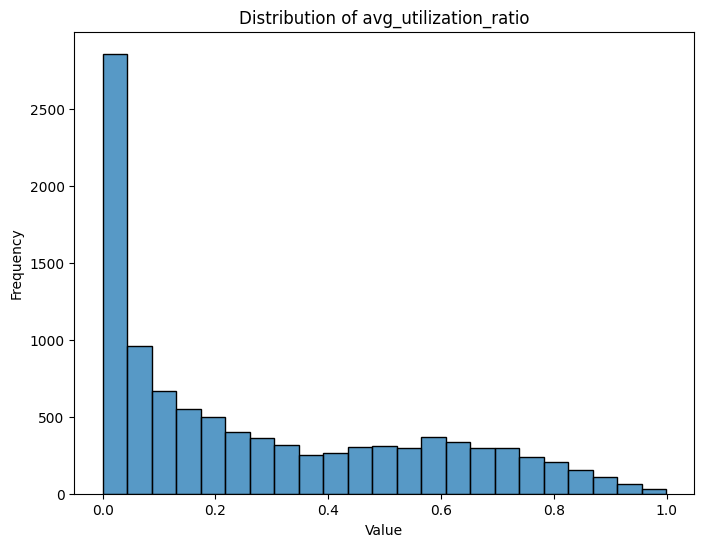

In [8]:
for col in numeric_cols:
    plt.figure(figsize=(8,6))
    ax=sns.histplot(x =col,data=customers,kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    

<b><u>Feature Engineering</b></u>

Since we now have an idea of the distribution from each numerical feature, lets try converting  the categorical features in to numerical features.

In [9]:
#creating a copy of our dataset before we makechanges
customers_modif = customers.copy()
customers_modif = customers.drop('customer_id',axis =1)

In [10]:
#changing the gender column into a binary feature column.
customers_modif['gender']=customers_modif['gender'].apply(lambda x:1 if x== 'M' else 0)

In [11]:
#Creating a Dict with values for education_level 
edu_mapping = {'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5}
customers_modif['education_level'] = customers_modif['education_level'].map(edu_mapping)

In [12]:
customers_modif = pd.get_dummies(customers_modif,columns=['marital_status'])

In [13]:
scaler = StandardScaler()
scaler.fit(customers_modif)
scaled_data = scaler.transform(customers_modif)
scaled_df = pd.DataFrame(scaled_data,columns=customers_modif.columns)
print(scaled_df)

            age    gender  dependent_count  education_level  estimated_income  \
0     -0.165406  1.059956         0.503368        -0.752211          0.175810   
1      0.333570 -0.943436         2.043199         0.662787         -0.967166   
2      0.583058  1.059956         0.503368         0.662787          0.785397   
3     -0.789126 -0.943436         1.273283        -0.752211         -0.636973   
4     -0.789126  1.059956         0.503368        -1.459710          0.074212   
...         ...       ...              ...              ...               ...   
10122  0.458314  1.059956        -0.266547         0.662787         -0.281380   
10123 -0.664382  1.059956        -0.266547         0.662787         -0.560775   
10124 -0.290150 -0.943436        -1.036462        -0.752211         -0.738571   
10125 -2.036565  1.059956        -0.266547         0.662787         -0.382978   
10126 -0.414894 -0.943436        -0.266547         0.662787         -0.662372   

       months_on_book  tota

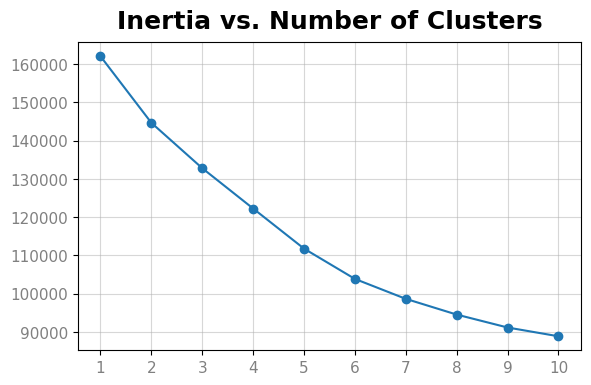

In [14]:

inertias = []
for k in range(1,11):
    model = KMeans(n_clusters=k,n_init=10)
    clusters=model.fit_predict(scaled_df)
    inertias.append(model.inertia_)
plt.figure(figsize=(6.5, 4))
plt.plot(range(1, 11), inertias, marker='o')

# Set the title and customize tick labels and gridlines
plt.title('Inertia vs. Number of Clusters', weight='bold', size=18, pad=10)
plt.xticks(ticks=range(1, 11), labels=range(1, 11), size=11, color='gray')
plt.yticks(size=11, color='gray')
plt.grid(alpha=0.5)
plt.show()

The above diagram shows an inverse proportion between the Clusters and inertias wherein when the clusters increased , inertia decreased. The most drastic drop of inertais is from cluster 1 to 2 dropping from 161,000 to 144,000 and inertia difference between each cluster started diminishing from clusters 5-6 .Hence lets try having our K as 6

In [15]:
model = KMeans(n_clusters =6,n_init=10)
clusters =model.fit_predict(scaled_df)

np.unique(clusters)


array([0, 1, 2, 3, 4, 5], dtype=int32)

Our clusters numbers are ranging from 0 to 5, lets add 1 to each of our clusters so that the label becomes 1 to 6

<b><u>Analyzing Results<b></u>

All that's left now is to analyze the results. We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

Lets create a column called CLUSTER in our dataset


In [16]:
customers['CLUSTER']= clusters + 1
customers['CLUSTER'].value_counts()

4    3261
5    2883
3    1638
6     867
2     740
1     738
Name: CLUSTER, dtype: int64

We can see clusters 2 and 4 having the highest values 3261 adn 2879 and 1 & 6 having the lowest values below 800.

To have a clear understanding of these numerical variables lets calculate the average of these variables in each cluster. Lets do that by creating a bar chart that's grouped by the cluster.
 


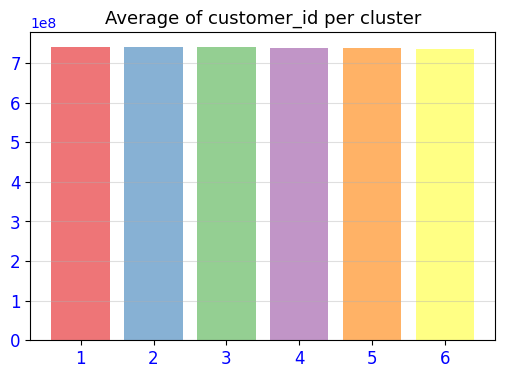

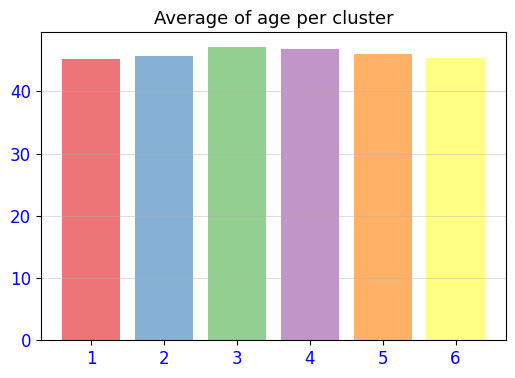

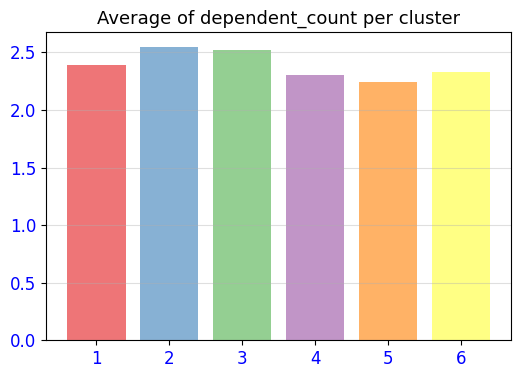

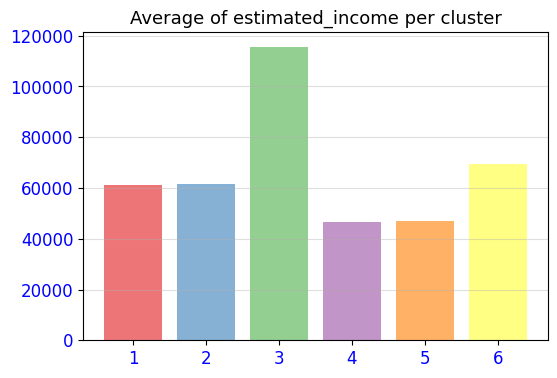

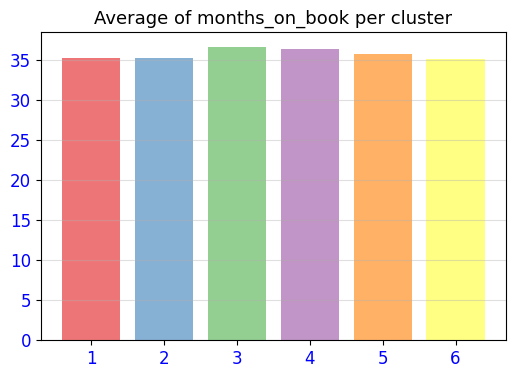

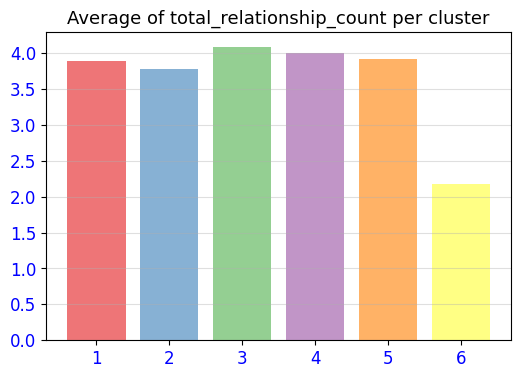

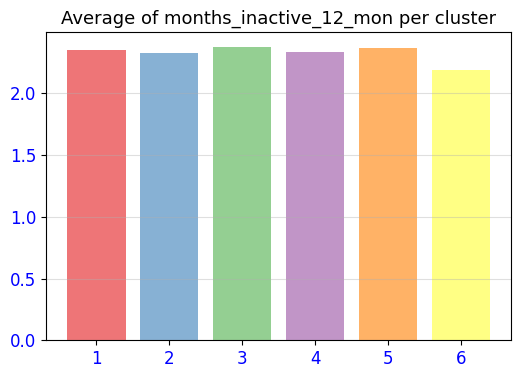

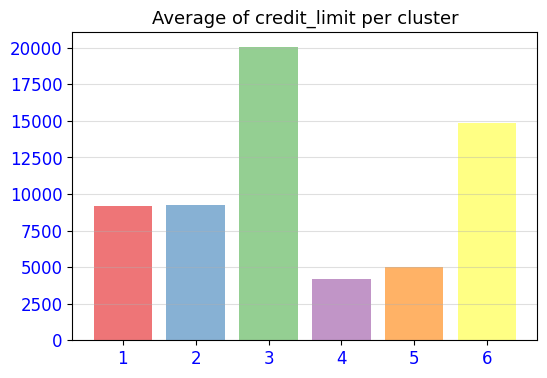

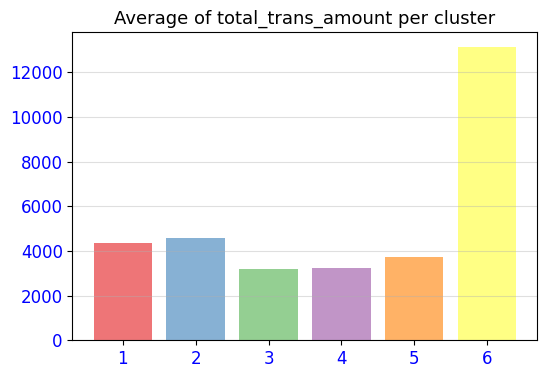

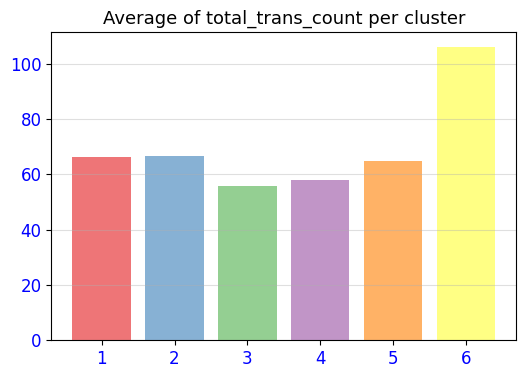

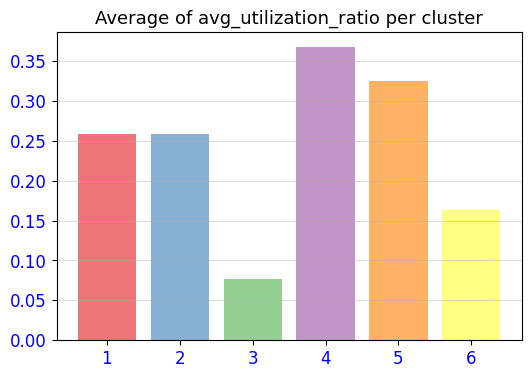

In [17]:
for i, col in enumerate(numeric_cols.columns,start=1):
    fig,ax = plt.subplots(figsize=(6,4))
    plot_df = customers.groupby('CLUSTER')[col].mean()
    ax.bar(plot_df.index,plot_df,color = sns.color_palette('Set1'),alpha =0.6)
    ax.set_title(f'Average of {col} per cluster',size =13)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True , alpha =0.4)
    ax.tick_params(axis ='both',labelsize=12,labelcolor = 'blue')
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

Following are the observations based on the barchart:-

<br>-Although clusters 4 and 5 have the lowest estimated income, their average utilization ratio is higher than that of the other clusters.</br>
<br>-Cluster 6 has the highest estimated income and credit limit with less avg utilization ratio</br> 
<br>-Cluster 2 has the highest total amount transacted </br>




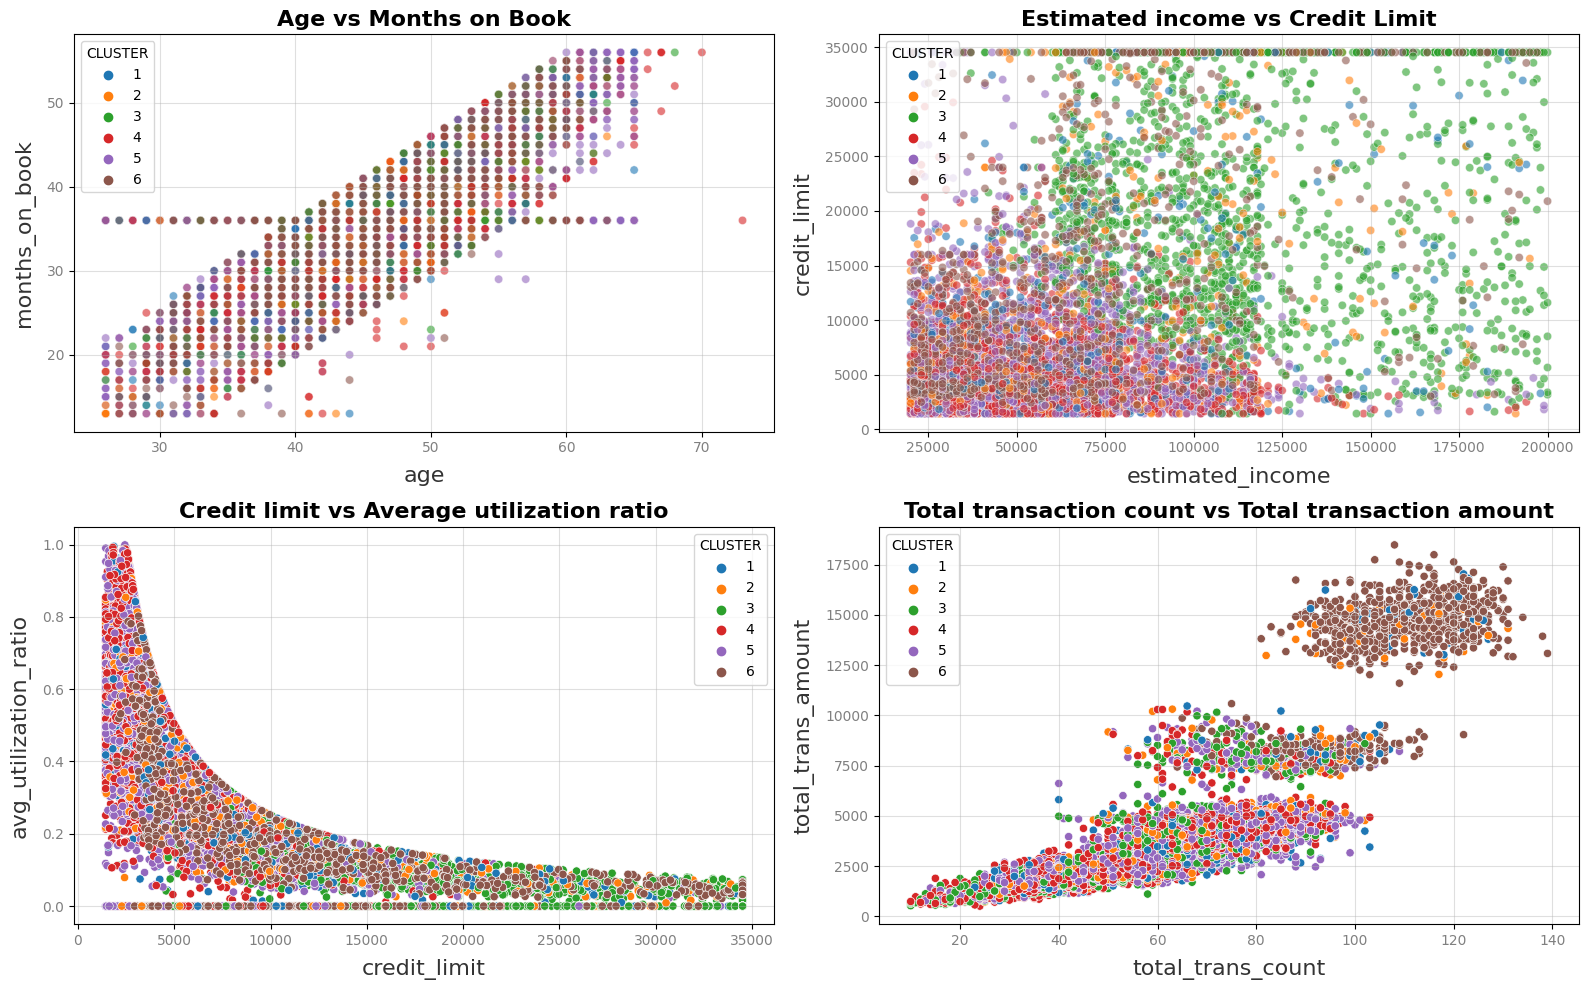

In [18]:
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16,10))
axes = [ax1,ax2,ax3,ax4]

sns.scatterplot(x='age',y='months_on_book',data = customers,hue='CLUSTER',palette = 'tab10',alpha =0.6,ax=ax1)
ax1.set_title('Age vs Months on Book',size =16,weight = 'bold')

sns.scatterplot(x='estimated_income' , y ='credit_limit', data = customers,hue = 'CLUSTER',palette = 'tab10',alpha = 0.6,ax=ax2)
ax2.set_title('Estimated income vs Credit Limit',size =16 , weight='bold')

sns.scatterplot(x='credit_limit',y='avg_utilization_ratio',data = customers,hue='CLUSTER',palette = 'tab10',ax=ax3)
ax3.set_title('Credit limit vs Average utilization ratio',size =16,weight='bold')

sns.scatterplot(x='total_trans_count',y='total_trans_amount',data=customers,hue='CLUSTER',palette='tab10',ax=ax4)
ax4.set_title('Total transaction count vs Total transaction amount',size =16,weight='bold')


for ax in axes :
    ax.set_xlabel(ax.get_xlabel(), color='#333333', labelpad=8, size=16)
    ax.set_ylabel(ax.get_ylabel(), color='#333333', labelpad=8, size=16)
    ax.tick_params(axis='both', labelcolor='gray')
    ax.grid(alpha=0.4)

# Adjust spacing between subplots and display them
plt.subplots_adjust(hspace=0.37)
plt.tight_layout()
plt.show()

Here are some insights based on the scatter plots:

<br>Older customers tend to have longer tenure, particularly in Cluster 5, which has older customers than the other clusters.</br>
<br>Although there is no distinct pattern, many customers across various clusters have credit limits under 20,000 USD and estimated incomes below 125,000 USD. Additionally, there is a noticeable group with credit limits around 35,000 USD and a wide range of estimated incomes.</br>
<br>As credit limits increase, customers' utilization ratios decrease rapidly before leveling off, indicating a negative exponential relationship between the two variables.</br>
<br>There are two distinct transaction behaviors – one group with low to medium transaction counts and total amounts, and another with high transaction counts and amounts. The latter group primarily consists of customers from Cluster 4.</br>
<br>Next, for the categorical columns, we'll plot the percentage distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.</br>

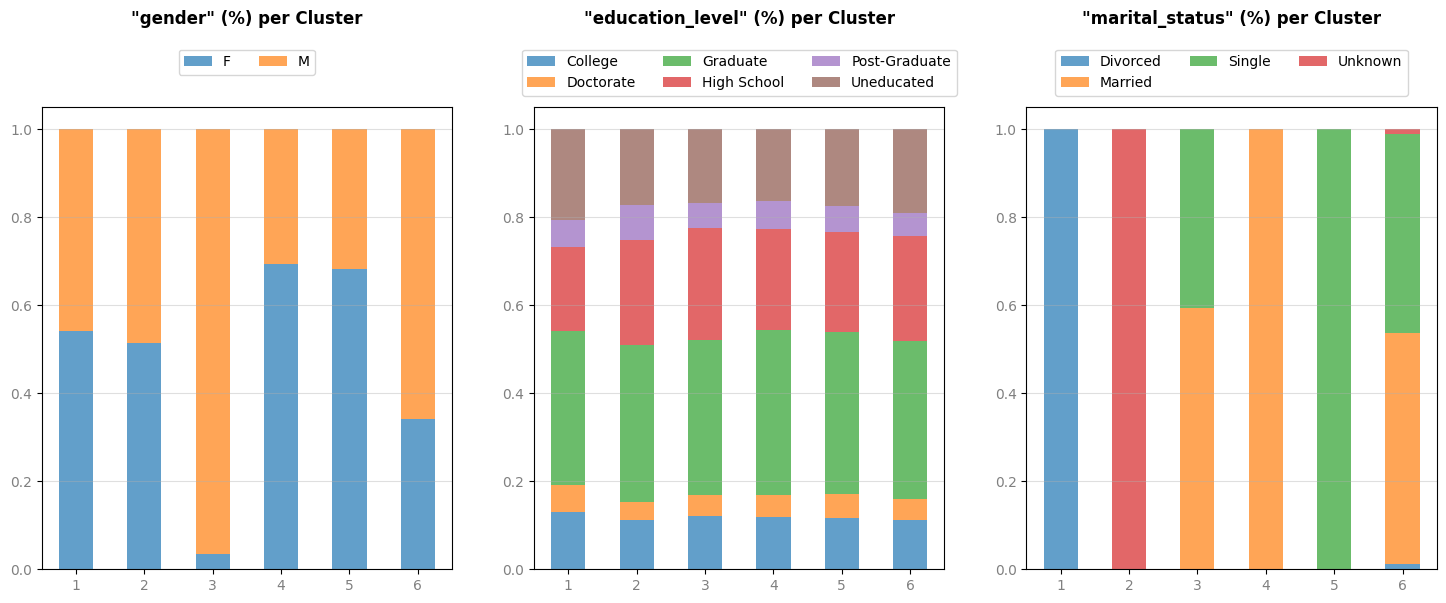

In [19]:
customers_categorical = customers.select_dtypes(include=['object'])

# Create a figure for subplots
fig = plt.figure(figsize=(18, 6))

# Iterate over categorical columns
for i, col in enumerate(customers_categorical, start=1):
    
    # Create a crosstab for the current column, normalized by cluster
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col],
                          values=customers[col], aggfunc='size', normalize='index')
    
    # Add subplot for the current column, and plot the stacked bar chart
    ax = fig.add_subplot(1, 3, i)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.7)
    
    # Set the title and styling for the subplot
    ax.set_title(f'"{col}" (%) per Cluster', weight='bold', pad=60)
    ax.set_xlabel('')
    
    # Customize grid and tick parameters
    ax.xaxis.grid(False)
    ax.yaxis.grid(True, alpha=0.4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='both', labelcolor='gray')
    
    # Center the legend above the subplot, with 3 columns for legend entries
    ax.legend(bbox_to_anchor=(0.5, 1.14), loc='upper center', ncol=3)

# Display the plot
plt.show()

Considering the categorical variables, we notice that the education levels are well divided among the clusters without significant differences. Moreover, Cluster 3 is composed almost entirely of married people, while the marital status of customers in Cluster 3 is unknown. Cluster 3 is predominantly male, and Cluster 1 consists entirely of single people.

<b><u>Conclusion<b></u>

<br><b>Cluster 1</b>
<br>Gender: Balanced distribution of males and females.</br>
<br>Marital Status: Fully divorced clients.</br>
<br><b>Insight</br></b> Men and women with low credit limits but have high balances.Can be motivated to spend more.</br>
<br><b>Cluster 2</br></b></b>
<br>Gender: Even distribution between males and females.</br>
<br>Marital Status: Unknown.</br>
<br><b>Insight</br></b> Need further information on marital status but, could be incentivised to spend more.</br>
<br><b>Cluster 3</br></b>
<br>Gender: Mostly male-dominated.</br>
<br>Marital Status: Majority are married.</br>
<br><b>Insight</br></b>People with high volume spent on the card but do not use it on a daily basis. Could be induced to spend more.</br>
<br><b>Cluster 4</br></b>
<br>Gender: Majority are female.</br>
<br>Marital Status: Mostly Married.
<br><b>Insight</br></b> Married individuals, primarily women, with low income and credit limits, tend to heavily utilize their credit for a few significant purchases.</br>
<br><b>Cluster 5</b>
<br>Gender: Female-dominated cluster.</br>
<br>Marital Status: Mostly single.</br>
<br><b>Insight</br></b>Older people and long-time customers. Low credit limit and transactions, but use the card very often. Could receive benefits by spending more money.</br>
<br><b>Cluster 6</br></b>
<br>Gender: Male-dominated cluster.</br>
<br>Marital Status:Contains equal distribution of Married and Single clients also a few of them unknown and divorced.</br>
<br><b>Insight</br></b> Equally distributed in terms of marital status people but containing mostly men, that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.</br>

In [20]:
customers[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,3
1,818770008,5
2,713982108,3
3,769911858,2
4,709106358,4
...,...,...
10122,772366833,6
10123,710638233,1
10124,716506083,4
10125,717406983,2
